# EDA em dataset do Spotify e Youtube

### 1.Importando bibliotecas e dataset

A. Importando as bibliotecas necessárias:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

B. Importando base de dados

In [2]:
df = pd.read_csv("/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv")

### 2.Compreendendo os dados

In [3]:
df.head(3)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07


In [4]:
df.shape #Saber a extensão da nossa base

(20718, 28)

In [5]:
df.dtypes #Saber a tipagem dos dados

Unnamed: 0            int64
Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [7]:
df.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


### 3.Tratamento de dados

In [8]:
df.drop(columns="Unnamed: 0", inplace=True) #Retirando a coluna Unnamed: 0, pois é a mesma do index

In [9]:
df.sample()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
17363,Chase Atlantic,https://open.spotify.com/artist/7cYEt1pqMgXJdq...,Church,Part One,single,spotify:track:7bbYT48HWWIbL3YKmtMNzn,0.556,0.824,5.0,-4.539,...,https://www.youtube.com/watch?v=vmM7h2fKdAY,"Chase Atlantic - ""Church"" (Official Music Video)",CHASE ATLANTIC,5752774.0,132023.0,2241.0,Chase Atlantic - Church\nPART ONE OUT NOW: htt...,False,False,57701985.0


In [10]:
df.isnull().sum() #Entendo os dados nulos

Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [11]:
df.nunique() #Entendendo a vriancia do dataset

Artist               2079
Url_spotify          2079
Track               17841
Album               11937
Album_type              3
Uri                 18862
Danceability          898
Energy               1268
Key                    12
Loudness             9417
Speechiness          1303
Acousticness         3138
Instrumentalness     4012
Liveness             1536
Valence              1293
Tempo               15024
Duration_ms         14690
Url_youtube         18154
Title               18146
Channel              6714
Views               19245
Likes               17939
Comments            10485
Description         17395
Licensed                2
official_video          2
Stream              18461
dtype: int64

In [12]:
df['Album_type'].value_counts() #Entendo quais são os dados da coluna Album_type

Album_type
album          14926
single          5004
compilation      788
Name: count, dtype: int64

In [13]:
df['Album_type'] = df["Album_type"].replace(['album', 'single', 'compilation'], ['Álbum', 'Single','Compilation']) #Substituindo 
#os valores encontrados, pelos valores corrigidos

In [14]:
df.columns

Index(['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [15]:
df.drop(['Url_spotify', 'Uri', 'Url_youtube', 'Title', 'Description'], axis=1, inplace = True) #Retirando colunas que não iremos usar

In [16]:
df.dropna(inplace=True) #Retirando dados faltantes

In [17]:
df.isnull().sum() #Base limpa

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
dtype: int64

In [18]:
df.info() #Base Limpa

<class 'pandas.core.frame.DataFrame'>
Index: 19549 entries, 0 to 20717
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19549 non-null  object 
 1   Track             19549 non-null  object 
 2   Album             19549 non-null  object 
 3   Album_type        19549 non-null  object 
 4   Danceability      19549 non-null  float64
 5   Energy            19549 non-null  float64
 6   Key               19549 non-null  float64
 7   Loudness          19549 non-null  float64
 8   Speechiness       19549 non-null  float64
 9   Acousticness      19549 non-null  float64
 10  Instrumentalness  19549 non-null  float64
 11  Liveness          19549 non-null  float64
 12  Valence           19549 non-null  float64
 13  Tempo             19549 non-null  float64
 14  Duration_ms       19549 non-null  float64
 15  Channel           19549 non-null  object 
 16  Views             19549 non-null  float64
 17

### 4.Analisando os dados 

D.Criando grupos de analises

In [19]:
#Chamando as colunas
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Channel', 'Views',
       'Likes', 'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [20]:
group_1 = df.groupby('Artist')['Likes'].value_counts().sort_values(ascending = False)
group_1.head(20)

Artist                       Likes    
Macklemore & Ryan Lewis      6604141.0    10
Rain Fruits Sounds           4923.0       10
Huey Lewis & The News        100171.0     10
Joan Jett & the Blackhearts  724659.0     10
The Mamas & The Papas        1678392.0    10
Nick Cave & The Bad Seeds    41865.0      10
Earth, Wind & Fire           4804872.0    10
Dimitri Vegas & Like Mike    50981.0      10
Mumford & Sons               449797.0     10
Die drei !!!                 32.0         10
Jowell & Randy               92753.0      10
Zezé Di Camargo & Luciano    143480.0     10
Kool & The Gang              533012.0     10
Teufelskicker                21.0          9
Chitãozinho & Xororó         663857.0      9
Fünf Freunde                 12.0          8
Benjamin Blümchen            62.0          8
Rionegro & Solimões          48433.0       7
TKKG                         1343.0        6
Gloria Gaynor                290573.0      5
Name: count, dtype: int64

In [21]:
group_2 = df.groupby('Artist')['Channel'].value_counts().sort_values(ascending=False)
group_2.head(20)

Artist                 Channel                           
Slipknot               Slipknot                              10
Maná                   OficialMana                           10
Oscar Maydon           Rancho Humilde                        10
Outkast                OutkastVEVO                           10
Falling In Reverse     Epitaph Records                       10
The Mamas & The Papas  Folk Experience                       10
The Killers            TheKillersVEVO                        10
The Kiboomers          The Kiboomers - Kids Music Channel    10
P!nk                   PinkVEVO                              10
Fifth Harmony          FifthHarmonyVEVO                      10
The Chicks             dixiechicksVEVO                       10
The Chainsmokers       ChainsmokersVEVO                      10
Bazzi                  Bazzi                                 10
PSY                    officialpsy                           10
Freddie Gibbs          Freddie Gibbs          

In [22]:
group_3 = df.groupby('Channel')['Likes'].value_counts().sort_values(ascending = False)
group_3.head(20)

Channel                    Likes    
Catheleya R                5730.0       13
Nick Cave & The Bad Seeds  41865.0      10
Jowell & Randy             92753.0      10
Lofi Fruits                4923.0       10
EarthWindandFireVEVO       4804872.0    10
Dimitri Vegas & Like Mike  50981.0      10
KoolAndTheGangVEVO         533012.0     10
Macklemore                 6604141.0    10
EUROPA Hörspiele           32.0         10
JoanJettVEVO               724659.0     10
MumfordAndSonsVEVO         449797.0     10
Folk Experience            1678392.0    10
ZezeeLucianoVEVO           143480.0     10
HueyLewisTheNewsVEVO       100171.0     10
EUROPA Hörspiele           21.0          9
Latin Waves                557111.0      9
                           557112.0      9
CHXVEVO                    663857.0      9
Pop Chartbusters           62411.0       9
EUROPA Hörspiele           12.0          8
Name: count, dtype: int64

In [23]:
artist_status = df.groupby('Artist').agg({
    'Views': 'mean',
    'Likes': 'mean',
    'Comments': 'mean'    
})
artist_status.head(10).sort_values(by= 'Views', ascending = False)

,Views,Likes,Comments
Artist,,,
(G)I-DLE,175495394.1,2446296.3,145624.6
*NSYNC,102783286.2,423342.3,22526.7
2 Chainz,89836823.6,668285.8,21276.8
$uicideboy$,33413510.8,357662.1,6512.7
112,21913445.9,150914.1,3569.6
21 Savage,17182285.0,282495.1,7173.4
$NOT,11078490.3,274716.3,8149.7
070 Shake,9609935.9,201300.5,4136.6
1nonly,8792951.4,165309.3,3075.3


In [24]:
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Channel', 'Views',
       'Likes', 'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [25]:
artist_music_status = df.groupby('Track').agg({
    'Likes': 'mean',
    'Comments': 'mean'
})
artist_music_status.head(10).sort_values(by= 'Likes', ascending = False)

,Likes,Comments
Track,,
#thatPOWER,4673535.0,301321.0
#1 - Colby O'Donis Remix,319099.0,12359.0
'Til You Can't,248571.0,7006.0
#3,157657.0,3262.0
'O Sole Mio - Live,58140.0,1454.0
!ly (feat. Coez),44530.0,814.0
#Ysya2020 Vol. 5 - Silbando,35206.0,521.0
#41,20527.0,1248.0
"'Zat You, Santa Claus? - Single Version",2434.0,71.0


E. Top 10 Músicas com mais Likes

In [26]:
likes_por_musica = df.groupby('Track')['Likes'].sum().reset_index()
top_10_musicas = likes_por_musica.sort_values(by='Likes',ascending = False).head(10)
print(top_10_musicas)

                                                Track        Likes
3507                                        Despacito  101577278.0
12265              See You Again (feat. Charlie Puth)   80295292.0
2026                      Boy With Luv (feat. Halsey)   55176413.0
16581                            lovely (with Khalid)   48852042.0
12392                                        Señorita   39692236.0
10258                           Old Town Road - Remix   37889373.0
13612  Taki Taki (with Selena Gomez, Ozuna & Cardi B)   37552053.0
3960                                         Dynamite   36609928.0
7851                                          Lean On   32422154.0
12419                                    Shape of You   31047780.0


F. Top 10 musicas com mais views

In [27]:
views_por_musica = df.groupby('Track')['Views'].sum().reset_index()
top_10_views = views_por_musica.sort_values(by='Views',ascending = False).head(10)
print(top_10_views)

                                                Track         Views
3507                                        Despacito  1.615930e+10
12265              See You Again (feat. Charlie Puth)  1.154760e+10
7851                                          Lean On  6.649670e+09
12419                                    Shape of You  5.908398e+09
2342                                    Calma - Remix  5.322011e+09
14391                       This Is What You Came For  5.252060e+09
13402      Swalla (feat. Nicki Minaj & Ty Dolla $ign)  5.162404e+09
15730                               Wheels on the Bus  4.898831e+09
13612  Taki Taki (with Selena Gomez, Ozuna & Cardi B)  4.828403e+09
15109                  Uptown Funk (feat. Bruno Mars)  4.821016e+09


G. Top 10 artistas com mais likes

In [28]:
artista_por_likes = df.groupby('Artist')['Likes'].sum().reset_index()
top_10_artistas_likes = artista_por_likes.sort_values(by='Likes', ascending = False).head(10)
print(top_10_artistas_likes)

               Artist        Likes
151               BTS  139403808.0
149         BLACKPINK  132302505.0
329      Charlie Puth   86336925.0
516        Ed Sheeran   83543319.0
908     Justin Bieber   78584348.0
199     Billie Eilish   73338537.0
764   Imagine Dragons   72274477.0
59        Alan Walker   67977702.0
411          DJ Snake   67775831.0
1129       Luis Fonsi   66908489.0


H. Top 10 artistas com mais views

In [29]:
artistas_por_views = df.groupby(['Artist','Track'])['Stream'].sum().reset_index()
top_10_artistas_views = artistas_por_views.sort_values(by = 'Stream', ascending = False).head(10)
print(top_10_artistas_views)

                 Artist                                          Track  \
17462        The Weeknd                                Blinding Lights   
4912         Ed Sheeran                                   Shape of You   
10069     Lewis Capaldi                              Someone You Loved   
14055       Post Malone                     rockstar (feat. 21 Savage)   
14053       Post Malone  Sunflower - Spider-Man: Into the Spider-Verse   
16581          Swae Lee  Sunflower - Spider-Man: Into the Spider-Verse   
4698              Drake                                      One Dance   
17026  The Chainsmokers                                         Closer   
6828             Halsey                                         Closer   
7272    Imagine Dragons                                       Believer   

             Stream  
17462  3.386520e+09  
4912   3.362005e+09  
10069  2.634013e+09  
14055  2.594927e+09  
14053  2.538330e+09  
16581  2.538330e+09  
4698   2.522432e+09  
17026  2.

I. Top 10 músicas com maior indice de dançabilidade

In [30]:
danceability_por_track = df.groupby('Track')['Danceability'].max().reset_index()
top_10_danceability = danceability_por_track.sort_values(by = 'Danceability', ascending = False)
print(top_10_danceability)

                                                 Track  Danceability
2236                                  CAN'T TOUCH THIS         0.975
5073                                      Funky Friday         0.975
5293                                     Give It To Me         0.975
11190                                      Psycho Pass         0.973
11416  RIP Young (feat. Project Pat & Juicy J) - Remix         0.971
...                                                ...           ...
541                                             Adieux         0.000
5854                                     Hello, Dolly!         0.000
650            Air Conditioner - Loopable with no fade         0.000
11725    Rigoletto / Act 3: "La donna è mobile" - Live         0.000
1134                                           Arrival         0.000

[16866 rows x 2 columns]


J. Top 10 artistas com maiores indices de dançabilidade

In [31]:
danceability_por_artistas = df.groupby('Artist')['Danceability'].max().reset_index()
top_10_danceability_artista = danceability_por_artistas.sort_values(by = 'Danceability', ascending = False)
print(top_10_danceability_artista)

                      Artist  Danceability
436                     Dave         0.975
146                      BIA         0.975
1850               Timbaland         0.975
1968             Xavier Wulf         0.973
1479             Project Pat         0.971
...                      ...           ...
1509      Rain Fruits Sounds         0.309
1377            Ocean Sounds         0.211
1708        Stephen Cleobury         0.209
1948  White Noise Baby Sleep         0.179
1378   Ocean Waves For Sleep         0.171

[2040 rows x 2 columns]


### 5.Análises Visuais

In [32]:
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Channel', 'Views',
       'Likes', 'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

K. Histograma

Text(0.5, 0, 'Tempo')

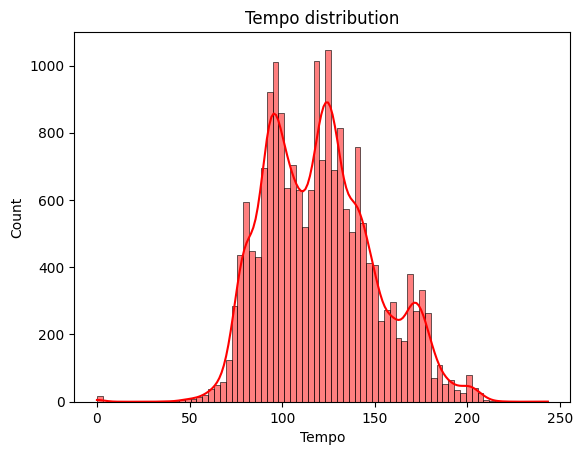

In [33]:
sns.histplot(df['Tempo'],kde = True, color = 'red')
plt.title('Tempo distribution')
plt.xlabel('Tempo')

L. Pairplot com cruzamento de variaveis

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


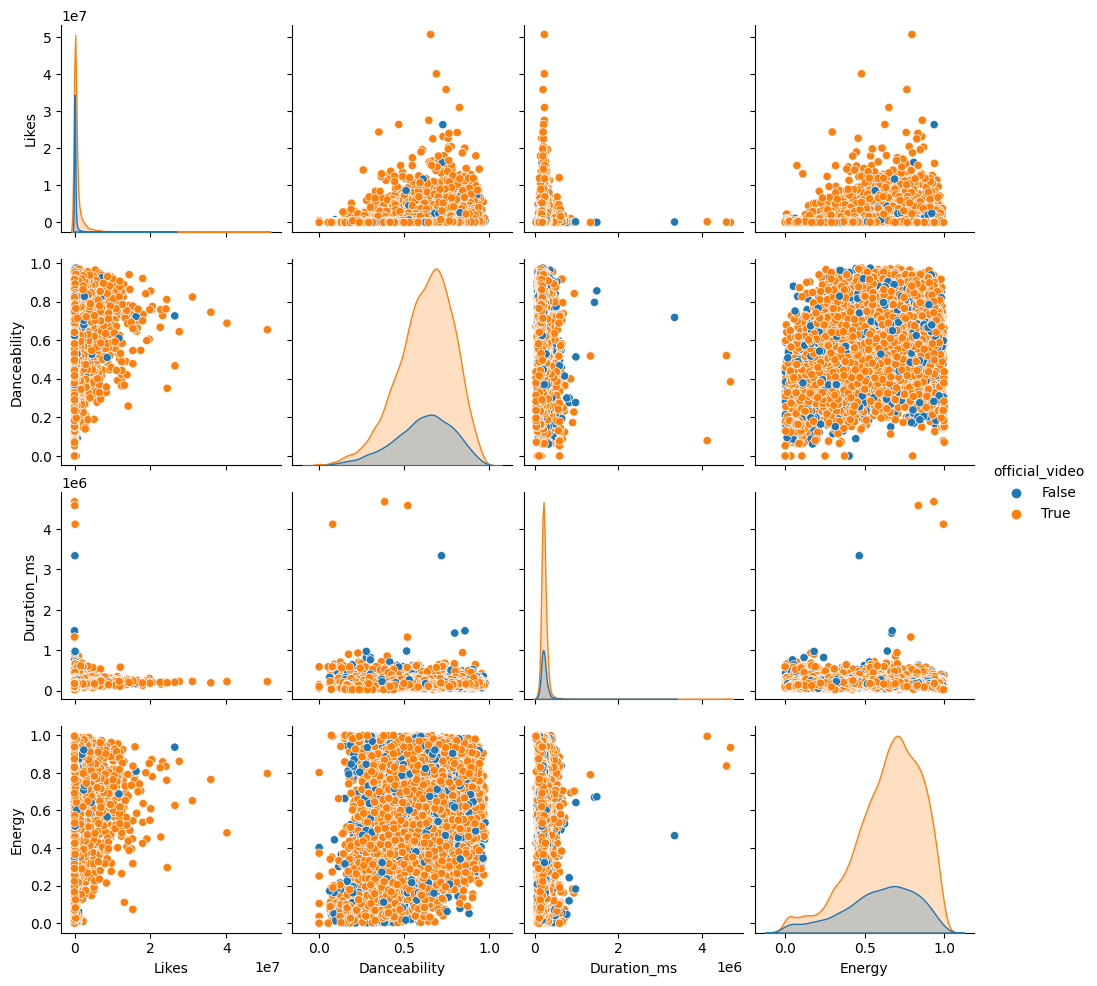

In [34]:
sns.pairplot(df, vars = ['Likes','Danceability', 'Duration_ms','Energy'], hue = 'official_video')

M. Boxplot de Likes em relação a energia da musica

Text(0, 0.5, 'Likes')

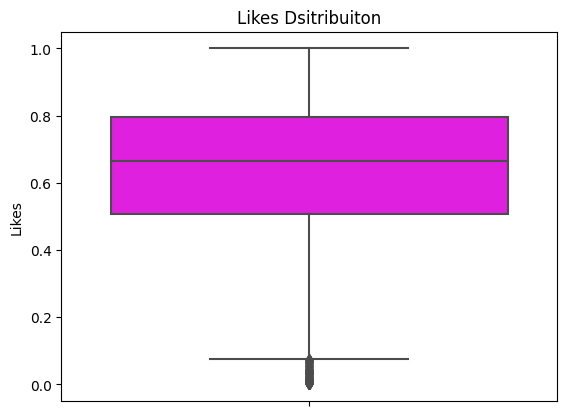

In [35]:
sns.boxplot(y = 'Energy', data=df, color = 'magenta')
plt.title('Likes Dsitribuiton')
plt.ylabel('Likes')

N.Gráfico de rosca para a distribuição de tipagem de album

In [36]:
album_type_count = df['Album_type'].value_counts()

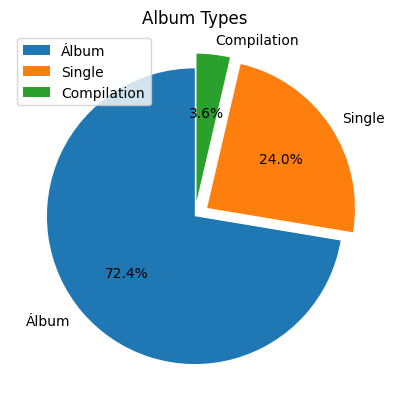

In [37]:
labels = album_type_count.index.tolist()
sizes = album_type_count.values.tolist()
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 90, explode = [0,0.1,0.1])

plt.title('Album Types')
plt.legend(labels, loc='best')

O. Numero de likes na base por tipo de album

Text(0, 0.5, 'Count')

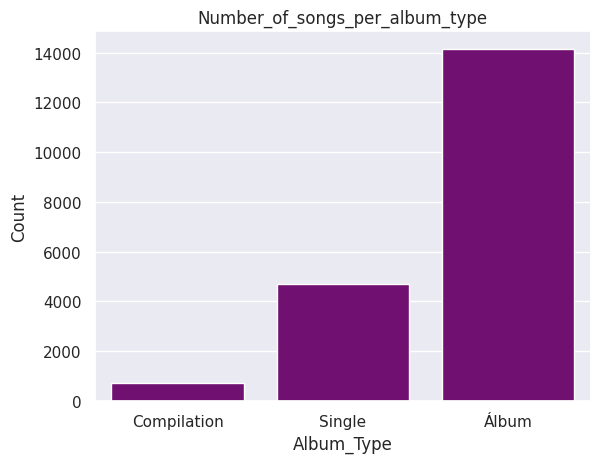

In [38]:
sns.set(style = 'darkgrid')

album_type_count = df.groupby('Album_type').count()['Likes'].reset_index(name=  'count')
sns.barplot(x = 'Album_type', y = 'count', data=album_type_count, color='purple')
plt.title('Number_of_songs_per_album_type')
plt.xlabel('Album_Type')
plt.ylabel('Count')

In [39]:
Social_count = df['Licensed'].value_counts()

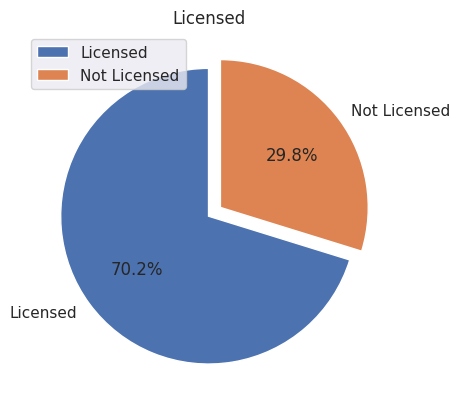

In [40]:
labels = ['Licensed', 'Not Licensed']
sizes = Social_count.values.tolist()
plt.pie(sizes, labels = labels, autopct= '%1.1f%%', startangle = 90, explode = [0,0.1])
plt.title('Licensed')
plt.legend(labels)

### 6. Analisando os Top 10 artistas no Spotify e Youtube

P. Top 10 Artistas por número de Streams e Views

In [41]:
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Channel', 'Views',
       'Likes', 'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [42]:
df_grouped = df.groupby('Artist')[['Views', 'Stream']].sum().reset_index()

In [43]:
df_grouped = df_grouped.sort_values(by = "Views", ascending = False)[:10]

In [44]:
df_melted = pd.melt(df_grouped, id_vars = ['Artist'], var_name = 'Plataformas', value_name = 'Counts')

Text(0.5, 1.0, 'TOP 10 Artistas on Youtube & Spotify')

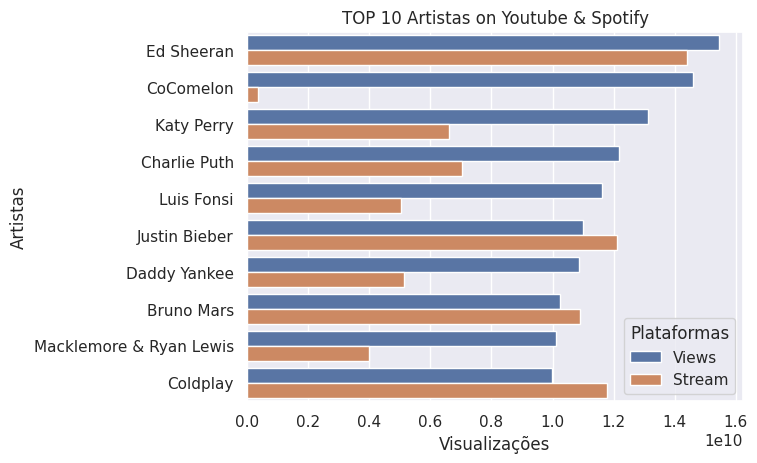

In [45]:
sns.barplot(y = 'Artist', x = 'Counts', hue = "Plataformas", data = df_melted, orient = 'h')
plt.xticks(rotation = 0)
plt.xlabel('Visualizações')
plt.ylabel('Artistas')
plt.title('TOP 10 Artistas on Youtube & Spotify')

Q. Top 10 Artistas por número de Likes e Comentários

In [46]:
df_grouped2 = df.groupby('Artist')[['Likes', 'Comments']].sum().reset_index()

In [47]:
df_grouped2 = df_grouped2.sort_values(by = 'Likes', ascending = False)[:10]

In [48]:
df_melted2 = pd.melt(df_grouped2, id_vars = 'Artist', var_name = 'Reaction', value_name = 'Counts')

Text(0.5, 1.0, 'TOP 10 Artistas on Spotify & Youtube')

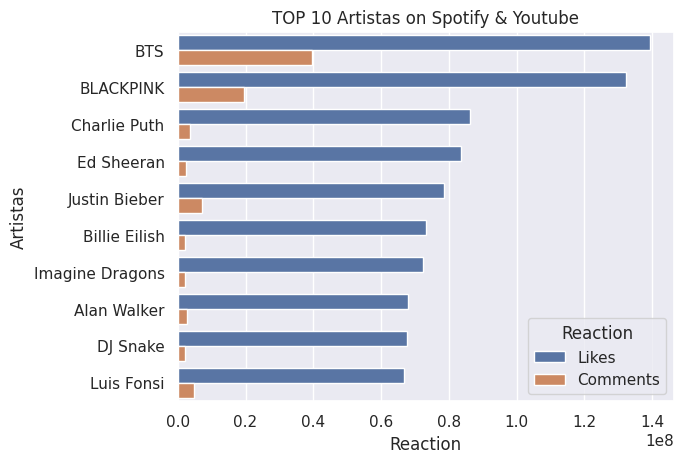

In [49]:
sns.barplot(y = 'Artist', x = 'Counts', data = df_melted2, hue = "Reaction", orient = 'h' )
plt.xticks(rotation = 0)
plt.xlabel('Reaction')
plt.ylabel('Artistas')
plt.title('TOP 10 Artistas on Spotify & Youtube')

U. Top 10 Artistas por número de Danceability e Energy

In [50]:
df_grouped3 = df.groupby('Artist')[['Danceability','Energy']].mean().reset_index()

In [51]:
df_grouped3 = df_grouped3.sort_values(by = 'Danceability', ascending = False)[:10]

In [52]:
df_melted3 = pd.melt(df_grouped3, id_vars = 'Artist', var_name = 'Energy', value_name = 'Mean')

Text(0.5, 1.0, 'TOP 10 Artistas no Spotify & Youtube')

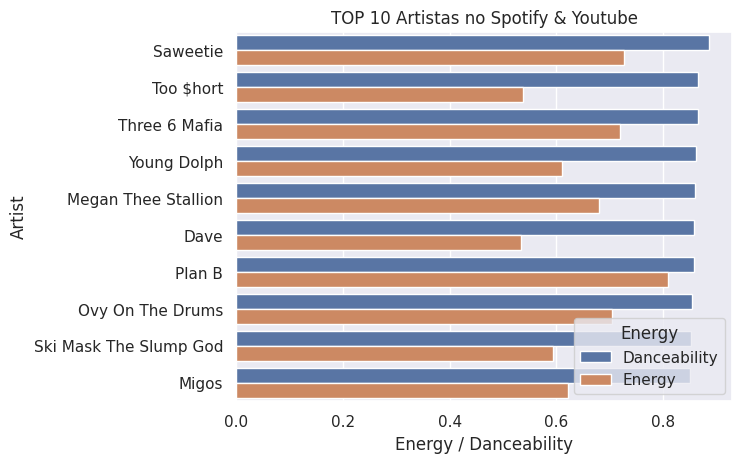

In [53]:
sns.barplot(y = 'Artist', x = 'Mean', data = df_melted3, hue = 'Energy', orient = 'h')
plt.xticks(rotation = 0)
plt.xlabel('Energy / Danceability')
plt.ylabel('Artist')
plt.title('TOP 10 Artistas no Spotify & Youtube')

In [54]:
df.head(5)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,Álbum,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,0.772,138.559,222640.0,Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,Álbum,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.852,92.761,200173.0,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),Single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.551,108.014,215150.0,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,Álbum,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.578,120.423,233867.0,Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,Álbum,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.525,167.953,340920.0,Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


### 7. Importando a base limpa para criação de dash 

In [55]:
df_reset = df.reset_index(drop=True)

In [56]:
df_reset.index = df_reset.index + 1

In [57]:
df_reset.to_excel('Spotify_Youtube.xlsx')